In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import common.util as util
from c6.c6_util import *
from common.EstimatedPdf import EstimatedPdf
from common.Pmf import Pmf
from c6.Player import Player

In [2]:
df_data = read_showcases("./data/showcases.2011.csv")

In [3]:
prices_1 = df_data.loc[:, "Showcase 1"]
bids_1 = df_data.loc[:, "Bid 1"]
diffs_1 = df_data.loc[:, "Difference 1"]
prices_2 = df_data.loc[:, "Showcase 2"]
bids_2 = df_data.loc[:, "Bid 2"]
diffs_2 = df_data.loc[:, "Difference 2"]

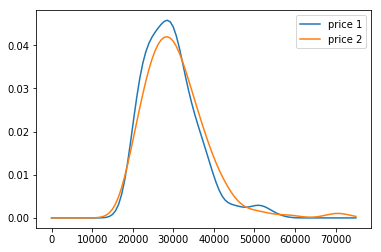

In [4]:
low, high, n = 0, 75000, 101
xs = np.linspace(low, high, n)

pdf_price_1 = EstimatedPdf(prices_1)
pmf_price_1 = pdf_price_1.make_pmf(xs, 'price 1')

pdf_price_2 = EstimatedPdf(prices_2)
pmf_price_2 = pdf_price_2.make_pmf(xs, 'price 2')

pmf_price_1.plot_with([pmf_price_2])

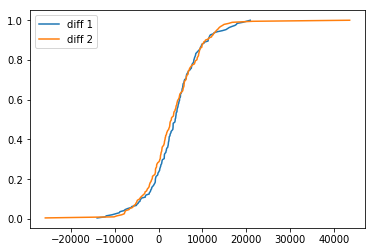

In [5]:
cdf_diff_1 = make_cdf_from_list(diffs_1, name='diff 1')
cdf_diff_2 = make_cdf_from_list(diffs_2, name='diff 2')
cdf_diff_1.plot_with([cdf_diff_2])

prior mean: 29482.74, posterior mean: 24382.43


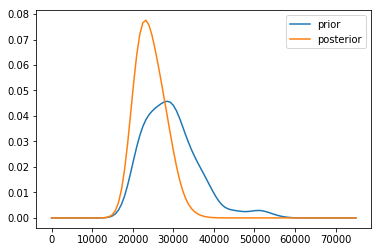

In [6]:
player_1 = Player(prices_1, bids_1, diffs_1)
player_1.make_beliefs(20000)
print("prior mean: {:.2f}, posterior mean: {:.2f}"
      .format(player_1.prior.mean(), player_1.posterior.mean()))
player_1.plot()

player 1 max gain: 16010.15, bid: 21000.0
player 2 max gain: 18881.10, bid: 31500.0


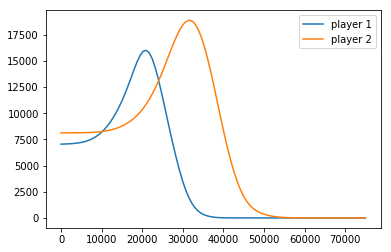

In [7]:
player_1 = Player(prices_1, bids_1, diffs_1)
player_2 = Player(prices_2, bids_2, diffs_2)
bids_1, gains_1 = player_1.calc_bid_gain(20000, player_2)
print("player 1 max gain: {:.2f}, bid: {}".format(*max(zip(gains_1, bids_1))))

player_1 = Player(prices_1, bids_1, diffs_1)
player_2 = Player(prices_2, bids_2, diffs_2)
bids_2, gains_2 = player_2.calc_bid_gain(40000, player_1)
print("player 2 max gain: {:.2f}, bid: {}".format(*max(zip(gains_2, bids_2))))

plt.figure()
plt.plot(bids_1, gains_1, label="player 1")
plt.plot(bids_2, gains_2, label="player 2")
plt.legend()